In [64]:
import os
from IPython.display import Video
Video("./Speed and Traffic Sign Detection test/output2.mp4", width=960, embed=True)

<div style="font-size: 18px; color: #9CA986;"> Install Required Packages </div>

In [2]:
!pip install ultralytics

# <div style="font-size: 20px; color: #D6BD98;"> 01. Import Libraries </div>

In [22]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

# <div style="font-size: 20px; color: #D6BD98;"> 02.Load and Display Data </div>

In [25]:
# Path to the images directory
image_dir = "./cardetection/car/train/images"

In [27]:
image_files = os.listdir(image_dir)
label_files = os.listdir('./cardetection/car/train/labels')
print(f"Total number of images: {len(image_files)}")
print(f"Total number of labels: {len(label_files)}")

Total number of images: 3530
Total number of labels: 3530


In [29]:
image_files = sorted(os.listdir(image_dir))
random_image_file = random.choice(image_files)
img_path = os.path.join(image_dir, random_image_file)
image = Image.open(img_path)

# Get size and channels
width, height = image.size
mode = image.mode  # 'RGB' for color, 'L' for grayscale, etc.

print(f"Size: {width} x {height}")
print(f"Mode: {mode}")

Size: 416 x 416
Mode: RGB


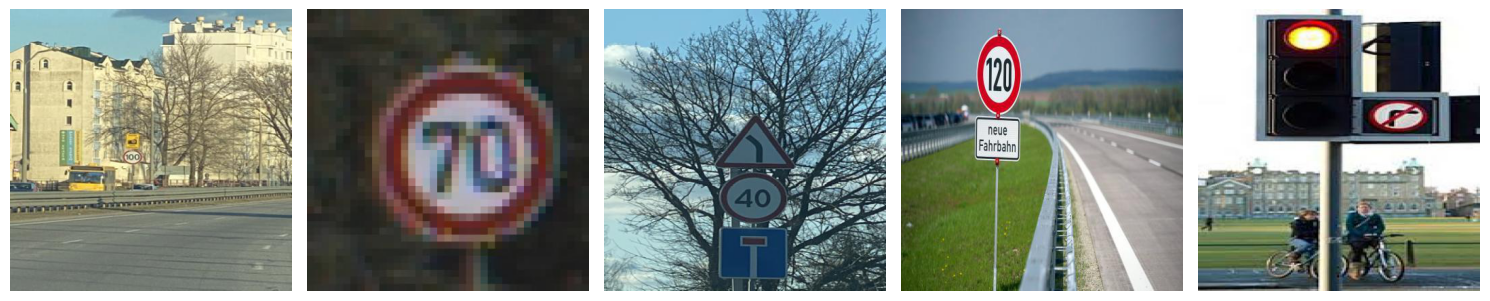

In [31]:
# Get a list of image files
image_files = sorted(os.listdir(image_dir))
random.shuffle(image_files)  # Shuffle the list for randomness

# Select the first 5 random images
image_files = image_files[:5]

# Plot images
plt.figure(figsize=(15, 10))
for i, img_file in enumerate(image_files):
    # Full path to the image
    img_path = os.path.join(image_dir, img_file)
    
    # Load the image
    image = Image.open(img_path)
    
    # Plot the image
    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(image)
    plt.axis('off')  # Hide axis

plt.tight_layout()
plt.show()

# <div style="font-size: 20px; color: #D6BD98;"> 03.Initialize and Train YOLO Model </div>

In [8]:
# # Load a pre-trained YOLO model, already executed once
# model = YOLO("yolov8n.pt")

# # Train the model
# results = model.train(
#     data="./cardetection/car/data.yaml", 
#     epochs=30,                                         
#     batch=-1,                                           
#     optimizer='AdamW'                                   
# )


Ultralytics 8.3.28  Python-3.10.15 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning C:\Users\mayur\Jupyter\ASJ\cardetection\car\train\labels.cache... 3530 images, 3 backgrounds, 0 corrupt
val: Scanning C:\Users\mayur\Jupyter\ASJ\cardetection\car\valid\labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██


val: New cache created: C:\Users\mayur\Jupyter\ASJ\cardetection\car\valid\labels.cache
Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.09G     0.8511      3.547      1.191         60        640: 100%|██████████| 118/118 [00:55<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:10

                   all        801        944        0.2      0.503      0.243      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.77G     0.7462      2.493      1.084         41        640: 100%|██████████| 118/118 [00:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.345      0.533      0.406      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.78G     0.7285      2.103      1.068         39        640: 100%|██████████| 118/118 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.447      0.524      0.492      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       3.8G     0.7178      1.753       1.06         46        640: 100%|██████████| 118/118 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944       0.73      0.636      0.722      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      3.77G     0.6985      1.503      1.043         56        640: 100%|██████████| 118/118 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.841      0.708      0.813      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      3.77G     0.6717      1.317      1.035         40        640: 100%|██████████| 118/118 [00:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.867      0.714      0.832      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      3.77G     0.6555      1.178      1.024         32        640: 100%|██████████| 118/118 [00:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.807      0.721      0.809       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      3.77G     0.6508        1.1      1.023         44        640: 100%|██████████| 118/118 [00:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.883      0.757      0.866      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      3.77G     0.6303      1.032       1.01         48        640: 100%|██████████| 118/118 [00:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.874      0.812      0.892      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      3.81G     0.6219      0.954      1.005         38        640: 100%|██████████| 118/118 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.928      0.785      0.892      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      3.77G     0.6279     0.9301      1.004         49        640: 100%|██████████| 118/118 [00:45<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.945      0.811      0.897      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      3.79G     0.6127     0.8913     0.9969         52        640: 100%|██████████| 118/118 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944       0.91      0.838      0.908      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      3.81G      0.605     0.8447     0.9955         66        640: 100%|██████████| 118/118 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.909      0.851       0.91       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.77G      0.592     0.8049     0.9858         45        640: 100%|██████████| 118/118 [00:57<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.941      0.838      0.922      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.77G     0.5918     0.7863     0.9852         50        640: 100%|██████████| 118/118 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944       0.93      0.854      0.927      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      3.79G     0.5875      0.788     0.9842         40        640: 100%|██████████| 118/118 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.941      0.861      0.932      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      3.77G     0.5662     0.7452     0.9738         44        640: 100%|██████████| 118/118 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.937      0.857      0.935      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      3.77G     0.5622     0.7223     0.9715         49        640: 100%|██████████| 118/118 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.937      0.875      0.943      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.77G     0.5609     0.7087     0.9741         45        640: 100%|██████████| 118/118 [00:46<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.956       0.85      0.936      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      3.77G     0.5589     0.6725     0.9693         33        640: 100%|██████████| 118/118 [00:47<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.941      0.867      0.941      0.805


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.09G     0.5605     0.5032     0.9441         28        640: 100%|██████████| 118/118 [00:44<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.911      0.887      0.943      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.77G     0.5502     0.4756      0.933         30        640: 100%|██████████| 118/118 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.925      0.899       0.95      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.77G     0.5458     0.4572     0.9305         21        640: 100%|██████████| 118/118 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.944      0.877      0.947      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      3.77G     0.5342     0.4399     0.9264         24        640: 100%|██████████| 118/118 [00:42<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.937      0.905      0.952      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      3.82G     0.5292     0.4211     0.9245         23        640: 100%|██████████| 118/118 [00:41<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944       0.95      0.895      0.951      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      3.77G      0.517        0.4     0.9205         23        640: 100%|██████████| 118/118 [00:41<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.929      0.905      0.954      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.77G     0.5145     0.3905     0.9147         24        640: 100%|██████████| 118/118 [00:42<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.945      0.905      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.77G     0.5034     0.3787     0.9073         26        640: 100%|██████████| 118/118 [00:43<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09

                   all        801        944      0.914      0.923      0.954      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.77G     0.5026     0.3692     0.9033         28        640: 100%|██████████| 118/118 [00:41<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944       0.95        0.9      0.956      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.77G     0.4933     0.3606     0.9005         28        640: 100%|██████████| 118/118 [00:42<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:08

                   all        801        944      0.929      0.912      0.957      0.832



30 epochs completed in 0.476 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.28  Python-3.10.15 torch-2.4.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:11


                   all        801        944      0.958      0.888      0.958      0.832
           Green Light         87        122       0.89      0.661      0.822      0.491
             Red Light         74        108      0.909      0.649      0.835      0.517
       Speed Limit 100         52         52      0.999      0.981      0.994      0.908
       Speed Limit 110         17         17      0.916      0.941      0.973      0.899
       Speed Limit 120         60         60          1      0.961      0.995      0.921
        Speed Limit 20         56         56      0.981      0.982      0.985      0.874
        Speed Limit 30         71         74      0.959      0.959      0.987      0.918
        Speed Limit 40         53         55      0.937      0.945      0.987      0.883
        Speed Limit 50         68         71          1      0.821       0.97      0.871
        Speed Limit 60         76         76       0.94      0.921      0.955      0.871
        Speed Limit 7

# <div style="font-size: 20px; color: #D6BD98;"> 04.Evaluate the Model </div>



<div style="font-size: 18px; color: #9CA986;"> 4.1 Confusion Matrix </div>

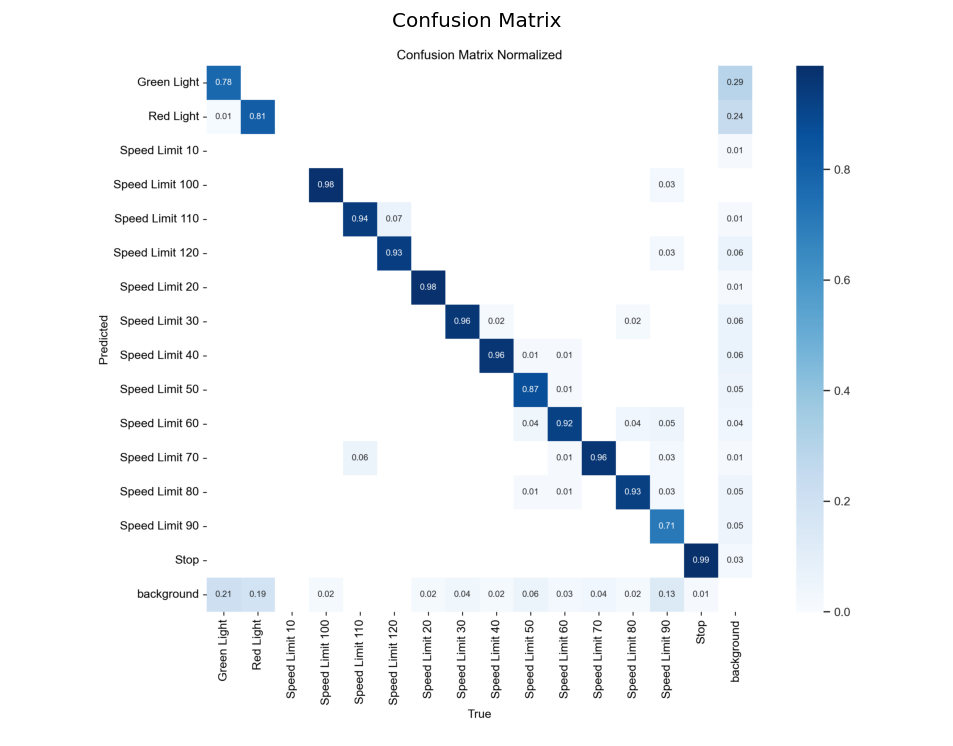

In [85]:
def display_confusion_matrix(post_training_files_path, cm_image_file):
    image_path = os.path.join(post_training_files_path, cm_image_file)
    
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.title('Confusion Matrix')
        plt.show()
    else:
        print(f"File {cm_image_file} not found at {post_training_files_path}")

# Path to the directory containing the image
post_training_files_path = './runs/detect/train3'

# Filename of the confusion matrix image
cm_image_file = 'confusion_matrix_normalized.png'

# Display the confusion matrix
display_confusion_matrix(post_training_files_path, cm_image_file)

<div style="font-size: 18px; color: #9CA986;"> 4.2 Report </div>


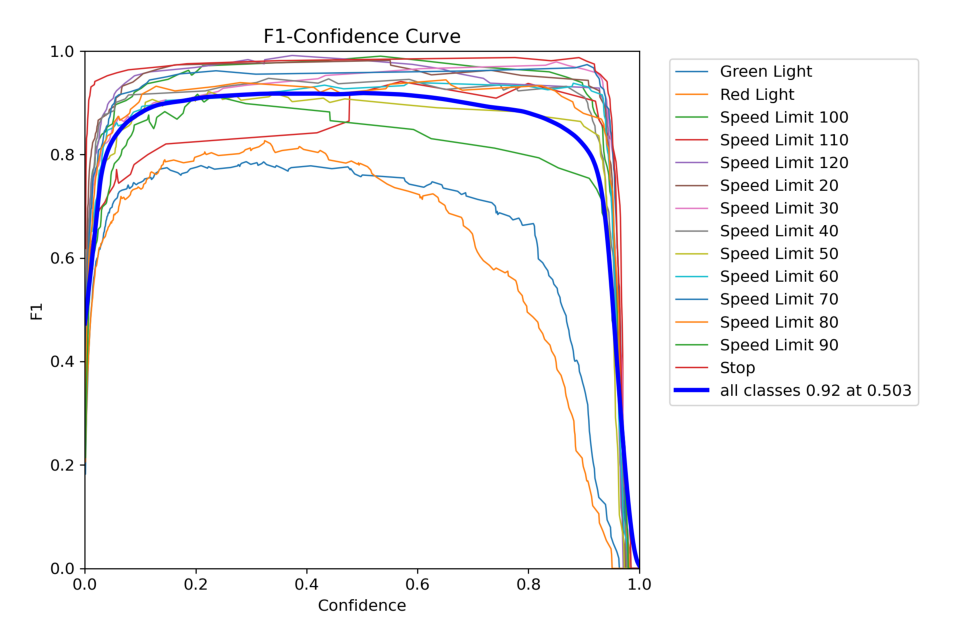

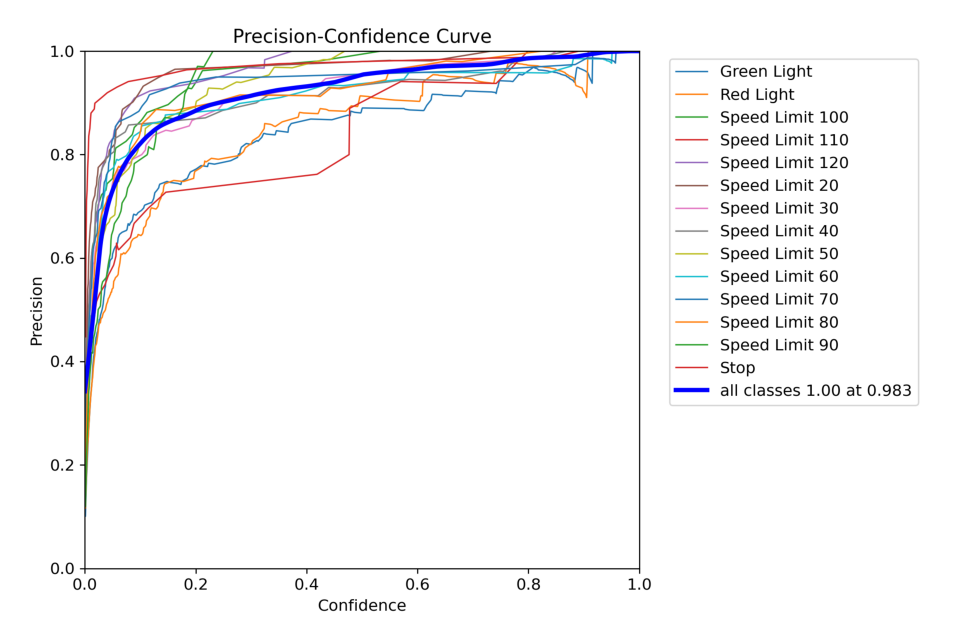

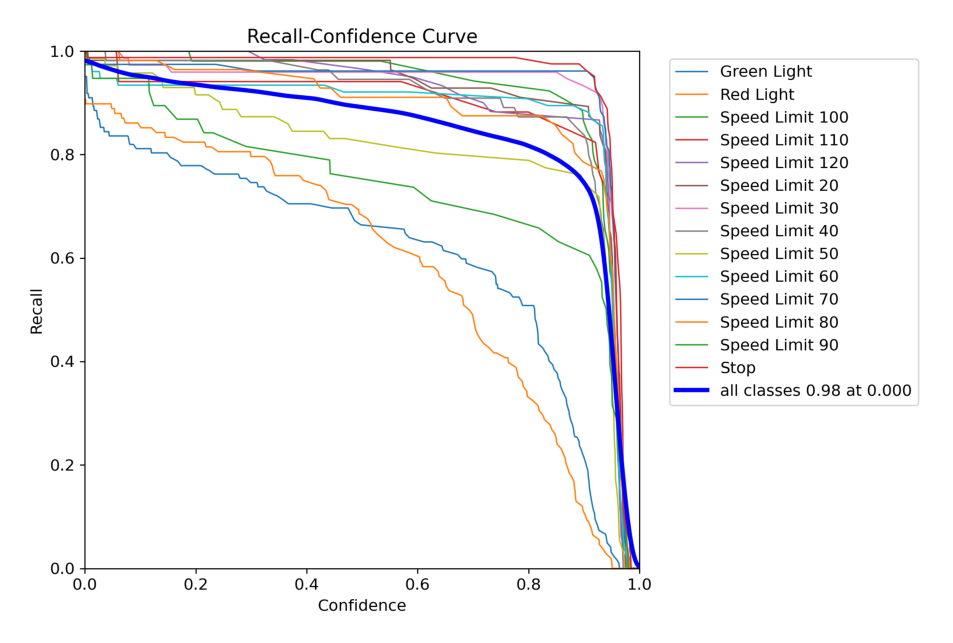

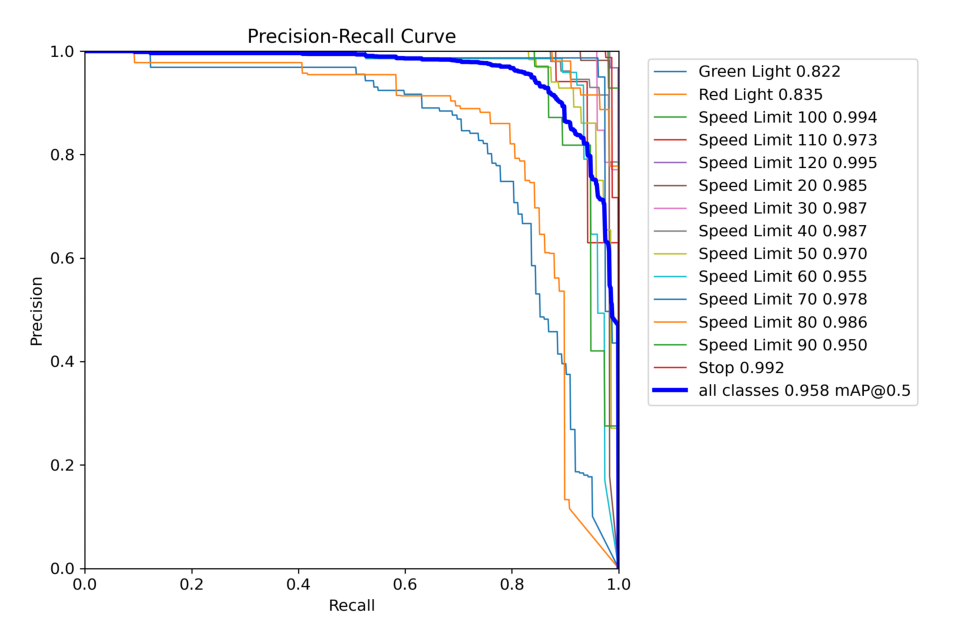

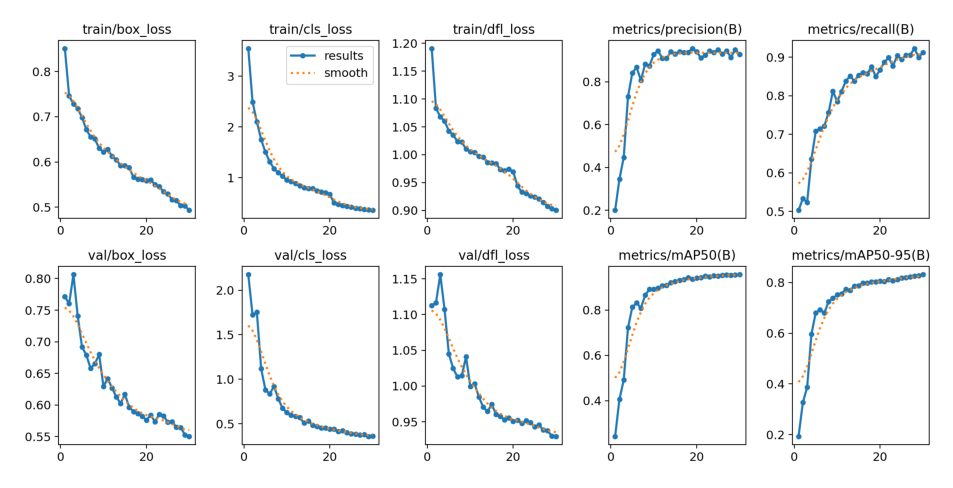

In [11]:

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

image_files = [
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]


post_training_files_path = './runs/detect/train3'
display_images(post_training_files_path, image_files)

In [12]:
Result_Final_model = pd.read_csv('./runs/detect/train3/results.csv')
Result_Final_model.tail(15)

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
15     16   921.002         0.58746         0.78803         0.98423   
16     17   977.523         0.56618         0.74518         0.97377   
17     18  1034.040         0.56224         0.72230         0.97152   
18     19  1090.710         0.56089         0.70871         0.97407   
19     20  1148.000         0.55888         0.67251         0.96933   
20     21  1240.210         0.56049         0.50315         0.94407   
21     22  1295.800         0.55019         0.47556         0.93297   
22     23  1348.690         0.54584         0.45719         0.93055   
23     24  1401.110         0.53424         0.43989         0.92643   
24     25  1452.790         0.52918         0.42106         0.92448   
25     26  1504.370         0.51702         0.40004         0.92052   
26     27  1556.510         0.51446         0.39051         0.91470   
27     28  1610.030         0.50339         0.37874         0.90727   
28     29  1661.800         0.50263         0.36924         0.90332   
29     30  1713.850         0.49332         0.36056         0.90048   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
15               0.94074            0.86056           0.93183   
16               0.93742            0.85698           0.93490   
17               0.93735            0.87513           0.94322   
18               0.95588            0.84993           0.93637   
19               0.94146            0.86732           0.94128   
20               0.91085            0.88748           0.94343   
21               0.92517            0.89883           0.95002   
22               0.94415            0.87699           0.94672   
23               0.93678            0.90463           0.95215   
24               0.94971            0.89474           0.95116   
25               0.92937            0.90502           0.95401   
26               0.94466            0.90548           0.95566   
27               0.91362            0.92284           0.95355   
28               0.95032            0.89974           0.95616   
29               0.92859            0.91213           0.95721   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
15              0.79869       0.59631       0.48149       0.96052  0.000266   
16              0.79787       0.58954       0.46791       0.95787  0.000248   
17              0.80265       0.58607       0.45128       0.95281  0.000231   
18              0.80296       0.58229       0.45298       0.95565  0.000214   
19              0.80548       0.57597       0.43952       0.95085  0.000196   
20              0.80408       0.58405       0.43940       0.95205  0.000179   
21              0.81205       0.57370       0.41215       0.94772  0.000161   
22              0.80800       0.58517       0.42277       0.95189  0.000144   
23              0.81229       0.58283       0.39992       0.94910  0.000127   
24              0.81738       0.57274       0.38699       0.94304  0.000109   
25              0.81939       0.57371       0.38250       0.94545  0.000092   
26              0.82329       0.56497       0.37362       0.93850  0.000075   
27              0.82545       0.56423       0.37822       0.93761  0.000057   
28              0.82766       0.55266       0.35769       0.93009  0.000040   
29              0.83170       0.55034       0.35997       0.92963  0.000023   

      lr/pg1    lr/pg2  
15  0.000266  0.000266  
16  0.000248  0.000248  
17  0.000231  0.000231  
18  0.000214  0.000214  
19  0.000196  0.000196  
20  0.000179  0.000179  
21  0.000161  0.000161  
22  0.000144  0.000144  
23  0.000127  0.000127  
24  0.000109  0.000109  
25  0.000092  0.000092  
26  0.000075  0.000075  
27  0.000057  0.000057  
28  0.000040  0.000040  
29  0.000023  0.000023

In [93]:
Valid_model = YOLO('./runs/detect/train3/weights/best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.103 🚀 Python-3.11.7 torch-2.4.1 CPU (Apple M2)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/abhaysingh/Jupyter/Term project/Yolo/cardetection/car/valid
                 Class     Images  Instances      Box(P          R      mAP50  m


                   all        801        944      0.958      0.888      0.957      0.832
           Green Light         87        122       0.89      0.661      0.814      0.492
             Red Light         74        108      0.909      0.648      0.835      0.512
       Speed Limit 100         52         52      0.998      0.981      0.994      0.905
       Speed Limit 110         17         17      0.915      0.941      0.972      0.893
       Speed Limit 120         60         60          1      0.961      0.995      0.921
        Speed Limit 20         56         56      0.981      0.982      0.985      0.872
        Speed Limit 30         71         74      0.959      0.959      0.987      0.917
        Speed Limit 40         53         55      0.937      0.945      0.987      0.881
        Speed Limit 50         68         71          1      0.821       0.97       0.87
        Speed Limit 60         76         76       0.94      0.921      0.955       0.87
        Speed Limit 7

# <div style="font-size: 20px; color: #D6BD98;"> 05. Test Model </div>


0: 640x640 1 Speed Limit 30, 70.1ms
Speed: 2.1ms preprocess, 70.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


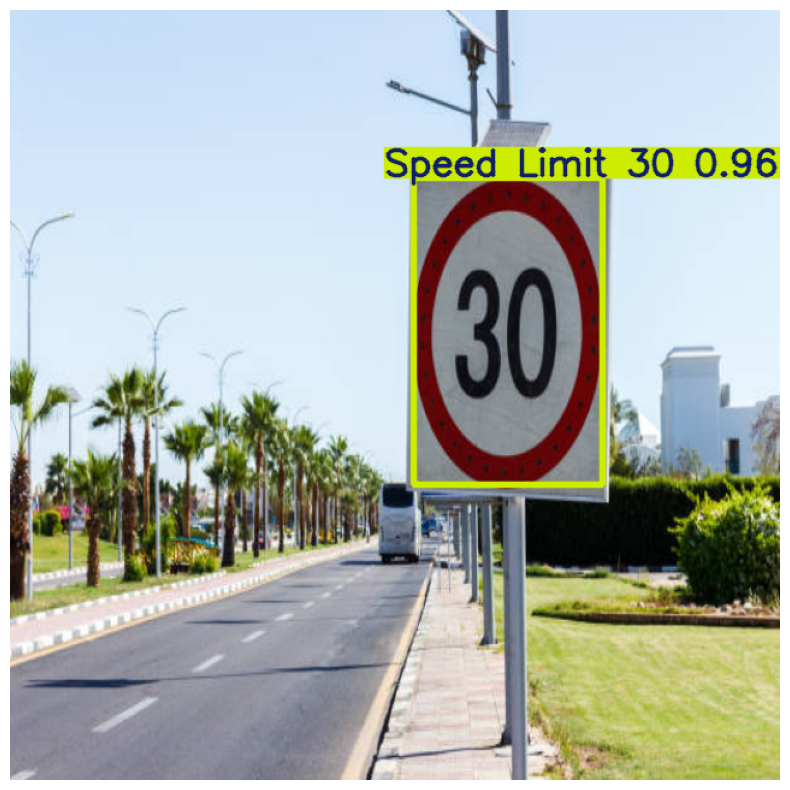

In [45]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = './Speed and Traffic Sign Detection test'
valid_images_path = dataset_path  # Directly point to the root directory

# List of all jpg and jpeg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg') or file.endswith('.jpeg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select a random image
    selected_image = random.choice(image_files)
    image_path = os.path.join(valid_images_path, selected_image)

    # Load image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded correctly
    if image is not None:
        # Resize image
        resized_image = resize_image(image, size=(640, 640))
        # Normalize image
        normalized_image = normalize_image(resized_image)
        
        # Convert the normalized image to uint8 data type
        normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
        
        # Predict with the model
        results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
        
        # Plot image with thicker bounding box
        annotated_image = results[0].plot(line_width=3)  # Increased line width for thicker bounding box
        annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        
        # Display the image
        plt.figure(figsize=(10, 10))
        plt.imshow(annotated_image_rgb)
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to load image {image_path}")
else:
    print("No images found in the directory.")


# <div style="font-size: 20px; color: #D6BD98;"> 06. Real Time Video </div>

In [48]:
!ffmpeg -y -loglevel panic -i "./Speed and Traffic Sign Detection test/test video.mp4" output.mp4
from IPython.display import Video

# Display the converted video
Video("output.mp4", width=960)


In [50]:
# Predict using the model with streaming to handle large videos
results = Valid_model.predict(source="./Speed and Traffic Sign Detection test/test video.mp4", stream=True, save=True,project="./Speed and Traffic Sign Detection test/", name="traffic_sign_detection2")

In [81]:
# Display the video 
Video("./Speed and Traffic Sign Detection test/output2.mp4", width=360, embed=True)

In [56]:
from ultralytics import YOLO
import os

# Load your YOLO model (ensure you’re using the correct model path)
model = YOLO("./runs/detect/train3/weights/best.pt")  # Replace with your model's path

# Define the source video and the custom output path
video_source = "output.mp4"  # Replace with your actual video path
project_dir = "./Speed and Traffic Sign Detection test/"
output_name = "traffic_sign_detection"

# Run prediction with specific parameters
results = model.predict(source=video_source, conf=0.3, save=True, project=project_dir, name=output_name)

# Check if the custom output folder was created
output_path = os.path.join(project_dir, output_name)
if os.path.exists(output_path):
    print(f"Detection complete. Check the output directory '{output_path}' for the video.")
    
    # List files in the output directory to confirm
    print("Files in output directory:")
    for root, dirs, files in os.walk(output_path):
        for file in files:
            print(os.path.join(root, file))  # Display full path of each file

else:
    print("Error: Output directory was not created. Please check for issues in model or directory permissions.")




WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/400) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/output.mp4: 640x384 2 Red Lights, 58.7ms
video 1/1 (frame 2/400) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/output.mp4: 640x384 2 Red Lights, 43.1ms
video 1/1 (frame 3/400) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/output.mp4: 640x384 2 Red Lights, 42.8ms
video 1/1 (frame 4/400) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/mod

In [58]:
results = model.predict(source="video.mp4", conf=0.3, save=True, project="./Speed and Traffic Sign Detection test/", name="traffic_sign_detection2")



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/video.mp4: 640x640 1 Stop, 96.1ms
video 1/1 (frame 2/508) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/video.mp4: 640x640 1 Stop, 78.3ms
video 1/1 (frame 3/508) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/video.mp4: 640x640 1 Stop, 66.1ms
video 1/1 (frame 4/508) /Users/abhaysingh/Jupyter/Term project/Yolo/Mayur run/model/video.mp4: 640x640

In [83]:
# Display the video 
Video("./Speed and Traffic Sign Detection test/traffic_sign_detection2/video.mp4", width=360, embed=True)
